<a href="https://colab.research.google.com/github/Punambhatt/Machine-Learning/blob/main/GD_RMSProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def quadratic_loss(x, y):
    return x**2 + 10 * y**2

In [4]:
def quadratic_grad(x, y):
    dx = 2 * x
    dy = 20 * y
    return np.array([dx, dy])

In [5]:
def batch_gradient_descent(grad_func, eta, epochs, start_point):
    x, y = start_point
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]

    for _ in range(epochs):
        grad = grad_func(x, y)
        x -= eta * grad[0]
        y -= eta * grad[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))

    return np.array(path), losses

In [6]:
def rmsprop_optimizer(grad_func, lr, beta, epsilon, epochs, start_point):
    x, y = start_point
    Eg2 = np.array([0.0, 0.0])
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]

    for _ in range(epochs):
        grad = grad_func(x, y)
        Eg2 = beta * Eg2 + (1 - beta) * (grad ** 2)

        x -= lr * grad[0] / (np.sqrt(Eg2[0]) + epsilon)
        y -= lr * grad[1] / (np.sqrt(Eg2[1]) + epsilon)

        path.append((x, y))
        losses.append(quadratic_loss(x, y))

    return np.array(path), losses

In [7]:
def plot_paths(function, paths, labels, title):
    X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
    Z = function(X, Y)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='jet')

    for path, label in zip(paths, labels):
        plt.plot(path[:, 0], path[:, 1], label=label)
        plt.scatter(path[0, 0], path[0, 1], color='green', marker='o', s=100, label="Start" if label == labels[0] else "")
        plt.scatter(path[-1, 0], path[-1, 1], color='red', marker='x', s=100, label="End" if label == labels[0] else "")

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

In [8]:
lr_gd = 0.1
lr_rmsprop = 0.1
beta = 0.9
epsilon = 1e-8
epochs = 100
start_point = (1.5, 1.5)

In [9]:
path_gd, losses_gd = batch_gradient_descent(quadratic_grad, lr_gd, epochs, start_point)

path_rmsprop, losses_rmsprop = rmsprop_optimizer(quadratic_grad, lr_rmsprop, beta, epsilon,epochs, start_point)

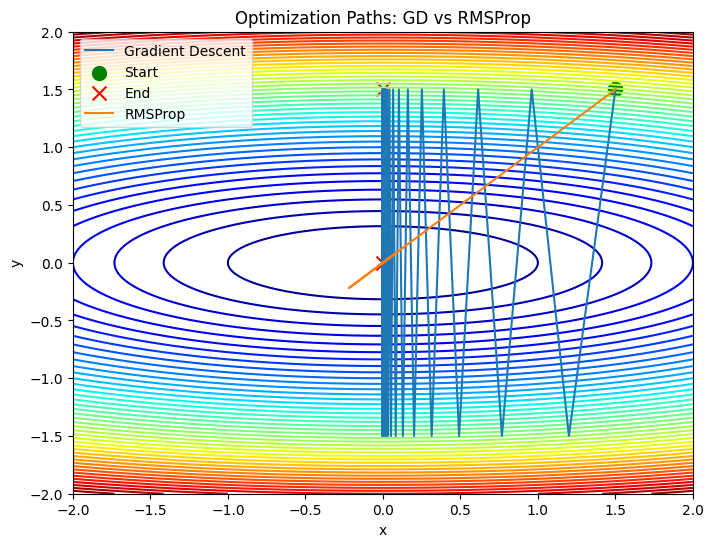

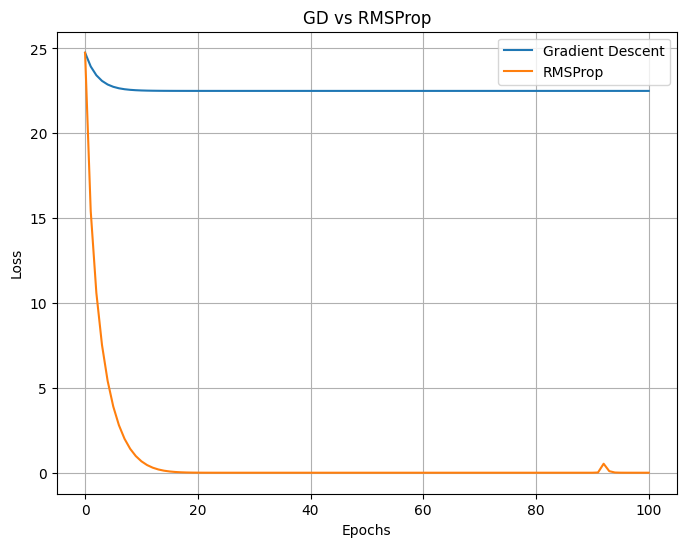

In [16]:
plot_paths(quadratic_loss, [path_gd, path_rmsprop], ["Gradient Descent", "RMSProp"], "Optimization Paths: GD vs RMSProp")

plot_losses([losses_gd, losses_rmsprop], ["Gradient Descent", "RMSProp"], "GD vs RMSProp")